## Laboratorio: Árboles de decisión, reglas y ensemble learning

### Importación de librerías
Importamos las librerías que se van a usar a lo largo del ejercicio

In [2]:
# Manejo de datos
from pandas import read_csv,factorize,DataFrame
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#train-test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Algoritmos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Carga de datos

In [3]:
#Leemos archivo desde un repositorio de github
url_github = (r'https://raw.githubusercontent.com/gad1989/TIA_actividad1/master/Laboratorio_dataset_car.csv')
datos = read_csv(url_github,delimiter=";")

### Caracteristicas del dataset
Realizamos una descripcion del dataset. Primero damos un primer vistazo a algunos registros

In [4]:
datos.head(5)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Con la función shape, observamos que cuenta con **1750 registros** y **7 atributos**

In [5]:
print(datos.shape)

(1750, 7)


Asimismo, podemos observar que todos los atributos (incluida la clase) tienen **valores categóricos**

In [6]:
print(datos.describe())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


In [7]:
datos.dtypes

Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
class          object
dtype: object

Analizamos la distribución de la clase. Podemos observar que está bastante desbalanceada ya que la mayoría de instancias tienen el valor **"unacc""** como clase

In [ ]:
print(datos.groupby("class").size())

NameError: name 'datos' is not defined

<AxesSubplot:>

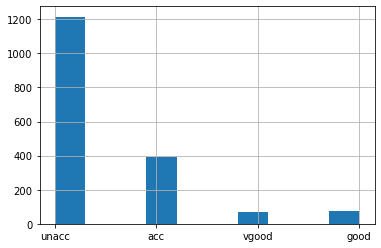

In [9]:
datos["class"].hist()

Por otro lado, se observa que la distribución de frecuencias de los atributos están bastante balanceadas

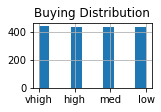

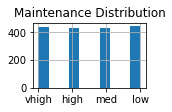

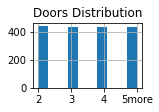

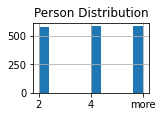

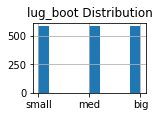

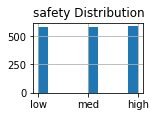

In [10]:
atributos = ["Buying","Maintenance","Doors","Person","lug_boot","safety"]
n_filas = 3
n_columnas = 3
for i, var_name in enumerate(atributos):
    fig=plt.figure()
    ax=fig.add_subplot(n_filas,n_columnas,i+1)
    datos[var_name].hist(ax=ax)
    ax.set_title(var_name+" Distribution")
    fig.tight_layout() 
    plt.show()

### Preparación de datos
Debido a que los algoritmos de árboles de clasificación de Scikit Learn no soportan atributos categóricos, se debe realizar una conversión de los mismos antes de iniciar con el entrenamiento. Se definen valores discretos para cada categoría según el siguiente diccionario:

In [11]:
convertion_dic = {"Buying": {"low": 0, "med": 1,"high":2,"vhigh":3},
                 "Maintenance": {"low": 0, "med": 1,"high":2,"vhigh":3},
                 "Doors": {"2": 2, "3": 3,"4":4,"5more":5},
                 "Person": {"2": 2, "4": 4,"more":5},
                 "lug_boot": {"small": 0, "med": 1,"big":2},
                 "safety": {"low": 0, "med": 1,"high":2}}

In [12]:
#Nuevo dataframe con atributos convertidos
datos = datos.replace(convertion_dic)
datos.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc


### Elección y comparación de algoritmos
En esta actividad se van a comparar un algoritmo de clasificación de tipo árbol de decisión (CART) y uno de tipo ensemble learning (Random Forest)

In [13]:
# Cargamos los algoritmos
models = []
models.append(('CART', DecisionTreeClassifier(criterion="gini",random_state=1,class_weight="balanced",min_samples_split=3)))
models.append(('RandomForest', RandomForestClassifier(n_estimators = 200, criterion="gini",random_state=1,class_weight="balanced",min_samples_split=2)))

Como es usual, se procede a dividir el conjunto de datos en **80%** para training y el **20%** restante para testing

In [14]:
test_size = 0.2
array = datos.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=test_size, random_state=1, shuffle=True)

Realizamos validación cruzada para cada unos de los algoritmos y obtenemos las medias de sus **accuracy**

In [15]:
# evaluamos cada modelo por turnos
results = []
names = []
n_splits=10
for name, model in models:
    kfold = StratifiedKFold(n_splits=n_splits, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()
))

CART: 0.981429 (0.013997)
RandomForest: 0.979286 (0.012556)


En base a los resultados obtenidos líneas arriba y haciendo una comparación gráfica usando boxplots, vemos que el algoritmo CART **se comporta ligeramente mejor** que Random Forest

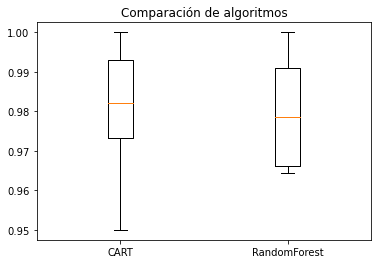

In [16]:
plt.boxplot(results, labels=names)
plt.title('Comparación de algoritmos')
plt.show()

## Validación de modelos
Se analizan las métricas obtenidas para cada uno de los algoritmos.

In [17]:
# Se divide el conjunto de datos en 80% para training y 20% para testing
test_size = 0.2
array = datos.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=test_size, random_state=1, shuffle=True)

In [18]:
# Se entrenan y validan ambos modelos 
cnf_matrix = []
for i in [0,1]:
    model = models[i][1]
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(models[i][0] + " Accuracy: ")
    print(accuracy_score(Y_validation, predictions))
    cnf_matrix.append(confusion_matrix(Y_validation, predictions))

CART Accuracy: 
0.9828571428571429
RandomForest Accuracy: 
0.9771428571428571


Dibujamos la **matriz de confusión** para cada uno

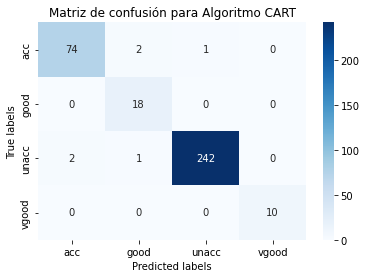

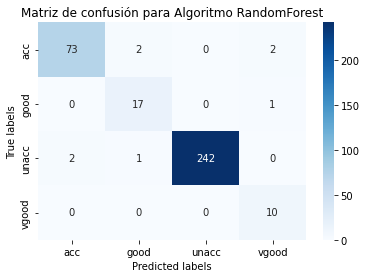

In [19]:
for i in [0,1]:
    plt.figure()
    ax= plt.subplot()
    sns.heatmap(cnf_matrix[i], annot=True, fmt='g', ax=ax, cmap="Blues")
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
    ax.set_title('Matriz de confusión para Algoritmo ' + models[i][0])
    ax.xaxis.set_ticklabels(['acc', 'good','unacc','vgood']); ax.yaxis.set_ticklabels(['acc', 'good','unacc','vgood'])

Evaluamos la matriz de confusión

In [20]:
lista_metricas = []
for i in [0,1]:
    FP = cnf_matrix[i].sum(axis=0) - np.diag(cnf_matrix[i])
    FN = cnf_matrix[i].sum(axis=1) - np.diag(cnf_matrix[i])
    TP = np.diag(cnf_matrix[i])
    TN = cnf_matrix[i].sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    #ACC = np.append(np.around(ACC,decimals=2),"Accuracy")
    TPR = np.append(np.around(TPR,decimals=2),"TP Rate(Recall)")
    TNR = np.append(np.around(TNR,decimals=2),"TN Rate(Especificidad)")
    PPV = np.append(np.around(PPV,decimals=2),"Precision")
    FPR = np.append(np.around(FPR,decimals=2),"FP Rate")
    FNR = np.append(np.around(FNR,decimals=2),"FN Rate")
    
    lista_metricas.append([TPR,TNR,PPV,FPR,FNR])

In [21]:
DataFrame(lista_metricas[0],columns=['acc', 'good', 'unacc','vgood','Metrica'])

,acc,good,unacc,vgood,Metrica
0,0.96,1.0,0.99,1.0,TP Rate(Recall)
1,0.99,0.99,0.99,1.0,TN Rate(Especificidad)
2,0.97,0.86,1.0,1.0,Precision
3,0.01,0.01,0.01,0.0,FP Rate
4,0.04,0.0,0.01,0.0,FN Rate


In [22]:
DataFrame(lista_metricas[1],columns=['acc', 'good', 'unacc','vgood','Metrica'])

,acc,good,unacc,vgood,Metrica
0,0.95,0.94,0.99,1.0,TP Rate(Recall)
1,0.99,0.99,1.0,0.99,TN Rate(Especificidad)
2,0.97,0.85,1.0,0.77,Precision
3,0.01,0.01,0.0,0.01,FP Rate
4,0.05,0.06,0.01,0.0,FN Rate
